In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("bbc_news_dataset.csv")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df["Category"].value_counts(dropna="False")

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [ ]:
df.iloc[2, 1]

'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions impr

In [ ]:
X = df["Text"]
Y = df["Category"]

In [ ]:
category_name = Y.unique()

In [8]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

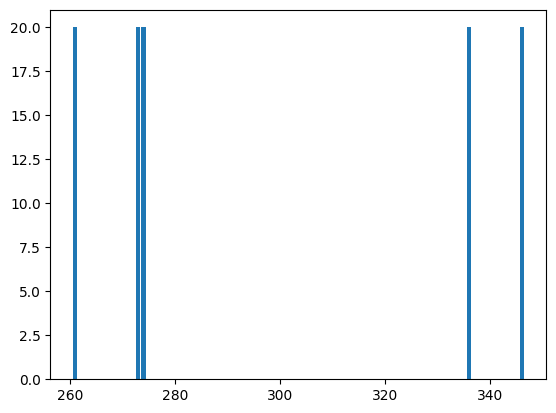

In [ ]:
plt.bar(df["Category"].value_counts(), height=20)

In [35]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [13]:
df["Category"].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

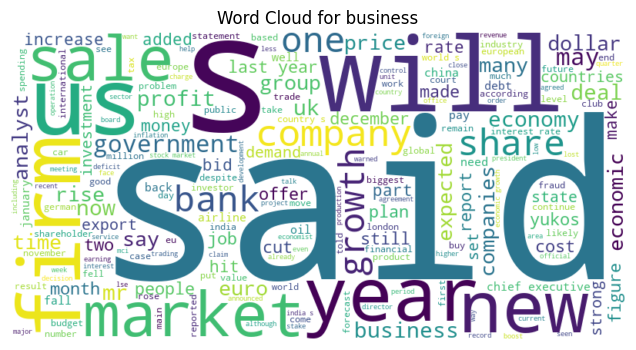

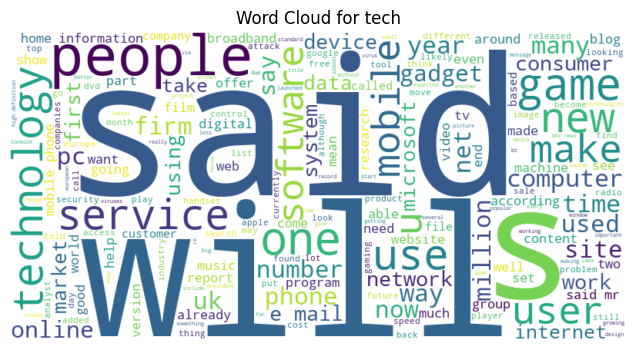

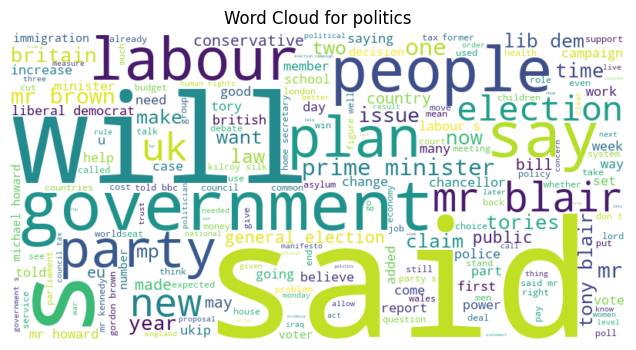

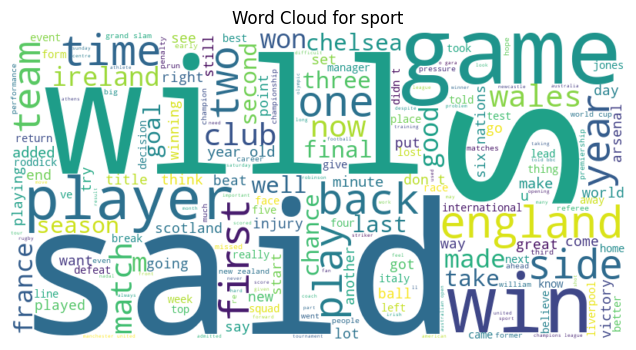

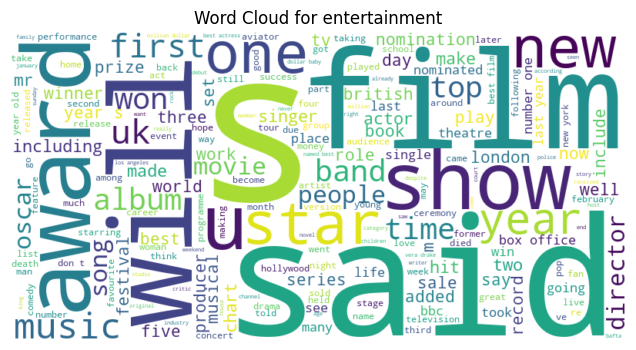

In [ ]:
from wordcloud import WordCloud

for category in category_name:
    text = " ".join(df[df["Category"] == category]["Text"].values)
    word_cloud = WordCloud(width=800, height=400, background_color="white").generate(
        text
    )
    plt.figure(figsize=(8, 4))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {category}")
    plt.axis("off")
    plt.savefig(f"Word Cloud for {category}.png")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [ ]:
corpus = xtrain.values
type(corpus)

numpy.ndarray

In [19]:
corpus

array(['fuming robinson blasts officials england coach andy robinson said he was  livid  after his side were denied two tries in sunday s 19-13 six nations loss to ireland in dublin.  mark cueto s first-half effort was ruled out for offside before the referee spurned tv replays when england crashed over in the dying minutes.  [i m] absolutely spitting. i m livid. there s two tries we ve been cost   robinson told bbc sport.  we ve got to go back to technology. i don t know why we didn t.  south african referee jonathan kaplan ruled that cueto was ahead of charlie hodgson when the fly-half hoisted his cross-field kick for the sale wing to gather.  kaplan then declined the chance to consult the fourth official when josh lewsey took the ball over the irish line under a pile of bodies for what could have been the game-winning try.  i think mark cueto scored a perfectly legal try and i think he should have gone to the video referee on josh lewsey   said robinson.  it is how we use the techno

In [22]:
tfidf = TfidfVectorizer()

In [23]:
nb_model = make_pipeline(TfidfVectorizer(stop_words="english"), MultinomialNB())

In [31]:
xtest

941     wal-mart is sued over rude lyrics the parents ...
297     howard taunts blair over splits tony blair s f...
271     fox attacks blair s tory  lies  tony blair lie...
774     online commons to spark debate online communit...
420     piero gives rugby perspective bbc sport unveil...
                              ...                        
1144    us crude prices surge above $53 us crude price...
1309    saudi ministry to employ women women will be e...
1444    label withdraws mcfadden s video the new video...
949     california sets fines for spyware the makers o...
1212    stars gear up for bafta ceremony film stars fr...
Name: Text, Length: 298, dtype: object

In [24]:
nb_model.fit(xtrain,ytrain)

,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [25]:
y_pred=nb_model.predict(xtest)

In [27]:
print("Accuracy",accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

Accuracy 0.9563758389261745
               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [28]:
confusion_matrix(ytest,y_pred)

array([[73,  0,  1,  0,  1],
       [ 1, 44,  1,  0,  0],
       [ 2,  0, 53,  1,  0],
       [ 0,  0,  0, 63,  0],
       [ 2,  0,  3,  1, 52]])

In [39]:
df["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [37]:
user_text="sandip bank manager started a tech company"

In [38]:
nb_model.predict([user_text])

array(['business'], dtype='<U13')

In [36]:
import joblib 
joblib.dump(nb_model,"news_category_predictor.joblib")

['news_category_predictor.joblib']

In [ ]:
vectorizer=TfidfVectorizer(stop_words="english"),

In [40]:
import torch
torch.__version__

'2.9.1'

In [41]:
torch.backends.mps.is_available()

True